# 4.10 Coding Etiquette & Excel Reporting

### This script contains the following points:

#### 1. (Step 1) Importing libraries, defining project path, and importing "orders_products_customers" 
#### 2. (Step 2)  PII
#### 3. (Step 3a) Creating column "region"
#### 4. (Step 3b) Analyzing spending habits between regions
#### 5. (Step 4a) Creating column for exclusion flag "low_activity?" (to identify low activity customers)
#### 6. (Step 4b) Exporting file as "orders_products_all_flagged.pkl"


#### 1. (Step 1 revisited) Importing libraries, defining project path
#### 2. (Step 5a) Creating customer profiles for generation and income 
#### 3. (Step 5b) Creating a flag for non-food and non-beverage departments 
#### 4. (Step 6) Creating visualizations for distribution of profiles
- (a) Generation profiles: Description and Frequency Chart
- (b) Income profiles: Description and Frequency Chart

#### 5. (Step 7) Aggregating max, min, and mean variables on a customer-profile level


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Data'

In [4]:
new_customer_data = pd.read_pickle(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Data/Prepared Data/orders_products_customers.pkl')

In [108]:
new_customer_data.head(25)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,...,spending_flag,prior_orders,frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income
0,0.0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,...,Low spender,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,0.0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,...,Low spender,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907.0,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,...,Low spender,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,1000.0,1000.0,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,...,Low spender,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,3265.0,3265.0,Mini Seedless Watermelon Pack,32.0,4.0,1.7,960220.0,138,17.0,5.0,...,Low spender,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620
5,4913.0,4913.0,Table Water Crackers,78.0,19.0,4.4,894221.0,138,23.0,5.0,...,Low spender,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620
6,6184.0,6184.0,Clementines,32.0,4.0,4.3,1977647.0,138,30.0,6.0,...,Low spender,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620
7,6901.0,6901.0,Raisin Bran,121.0,14.0,2.9,1154289.0,138,18.0,1.0,...,Low spender,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620
8,7147.0,7147.0,Classic Baby Creamers Potatoes,83.0,4.0,9.0,930730.0,138,2.0,0.0,...,Low spender,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620
9,7987.0,7987.0,Hazelnut Spread with Cocoa,88.0,13.0,12.8,1592314.0,138,5.0,0.0,...,Low spender,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620


# 3. Creating a regional segmentation of the data

In [110]:
#Regions
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon','California', 'Hawaii']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Lousiana']
midwest = ['Wisconsi', 'Michigan', 'Illinois', 'Indiana', 'Indiana', ' Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', ' Iowa', 'Missouri']
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [111]:
#State Regions
new_customer_data.loc[new_customer_data['state'].isin(west), 'region'] = 'West'
new_customer_data.loc[new_customer_data['state'].isin(south), 'region'] = 'South'
new_customer_data.loc[new_customer_data['state'].isin(midwest), 'region'] = 'Midwest'
new_customer_data.loc[new_customer_data['state'].isin(northeast), 'region'] = 'Northeast'

In [112]:
new_customer_data['region'].value_counts(dropna = False)

South        9503441
West         7765088
Northeast    5356272
Midwest      5347668
NaN          2356295
Name: region, dtype: int64

In [113]:
#Checking specific habits with crosstab
crosstab = pd.crosstab(new_customer_data['region'], new_customer_data['spending_flag'], dropna = False)

In [114]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,111742,5235926
Northeast,102905,5253367
South,187852,9315588
West,149922,7615166


The South has the greatest number of 'High Spending' customers, while the Northeast has the lowest.

# 4. Creating exclusion flag for low-activity customers

In [10]:
new_customer_data.describe()

,Unnamed: 0,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,average_price,prior_orders,age,number_dependants,income
count,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07
mean,2.559820e+04,2.559649e+04,7.119183e+01,9.922036e+00,1.197725e+01,1.710734e+06,1.029339e+05,1.824729e+01,2.740832e+00,1.341142e+01,1.110408e+01,8.355623e+00,6.299463e-01,3.420208e+01,1.197725e+01,1.110408e+01,4.946447e+01,1.501960e+00,9.954015e+04
std,1.408344e+04,1.408189e+04,3.821413e+01,6.281967e+00,4.963730e+02,9.872433e+05,5.946847e+04,1.759198e+01,2.087951e+00,4.246834e+00,8.779064e+00,7.133935e+00,4.828188e-01,2.521129e+01,8.429401e+01,5.884318e+00,1.848533e+01,1.118932e+00,4.310834e+04
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354100e+04,1.354100e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.561425e+05,5.140900e+04,6.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.400000e+01,7.385366e+00,6.752252e+00,3.300000e+01,1.000000e+00,6.712900e+04
50%,2.527300e+04,2.527200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710898e+06,1.025990e+05,1.200000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.800000e+01,7.825526e+00,9.652174e+00,4.900000e+01,2.000000e+00,9.666500e+04
75%,3.795100e+04,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565509e+06,1.543850e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.800000e+01,8.257932e+00,1.444417e+01,6.500000e+01,3.000000e+00,1.279650e+05
max,4.969200e+04,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,3.333903e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [5]:
new_customer_data.loc[new_customer_data['order_number'] < 5, 'customer_revenue_loc'] = 'Low Revenue Customer'
new_customer_data.loc[new_customer_data['order_number'] >= 5, 'customer_revenue_loc'] = 'High Revenue Customer'

In [6]:
new_customer_data['customer_revenue_loc'].value_counts(dropna = False)

High Revenue Customer    24414877
Low Revenue Customer      5913886
NaN                             1
Name: customer_revenue_loc, dtype: int64

In [7]:
#Remove Low Revenue Customer 
final_customer_data = new_customer_data[new_customer_data['customer_revenue_loc'] == 'High Revenue Customer']

In [8]:
final_customer_data.shape

(24414877, 34)

# 5. Profiling

In [9]:
#Creating Profiles
final_customer_data.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,...,prior_orders,frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,customer_revenue_loc
0,0.0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,...,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620,High Revenue Customer
1,0.0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,...,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620,High Revenue Customer
2,907.0,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,...,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620,High Revenue Customer
3,1000.0,1000.0,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,...,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620,High Revenue Customer
4,3265.0,3265.0,Mini Seedless Watermelon Pack,32.0,4.0,1.7,960220.0,138,17.0,5.0,...,10.4,Regular customer,Male,Minnesota,81,8/1/2019,1,married,49620,High Revenue Customer


In [10]:
#Customers Based on Age
final_customer_data.loc[(final_customer_data['age'] >= 18) & (final_customer_data['age'] < 40), 'age category'] ='Young Adult'
final_customer_data.loc[(final_customer_data['age'] >= 40 ) & (final_customer_data['age'] < 65), 'age category'] = 'Middle Age'
final_customer_data.loc[(final_customer_data['age'] >= 65), 'age category'] = 'Senior'

/var/folders/8w/y0j0hy213tj11t4fgrr14y1h0000gn/T/ipykernel_2901/4278825748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_customer_data.loc[(final_customer_data['age'] >= 18) & (final_customer_data['age'] < 40), 'age category'] ='Young Adult'


In [11]:
#Age Categroy Flag
final_customer_data['age category'].value_counts(dropna = False)

Middle Age     9537452
Young Adult    8418975
Senior         6458450
Name: age category, dtype: int64

In [12]:
#Customers Based on Income 
final_customer_data['income'].describe()

count    2.441488e+07
mean     9.989505e+04
std      4.333357e+04
min      2.590300e+04
25%      6.752400e+04
50%      9.683600e+04
75%      1.281600e+05
max      5.939010e+05
Name: income, dtype: float64

In [13]:
#create income category with flag
final_customer_data.loc[final_customer_data['income']< 70000, 'income_category'] = 'Low'
final_customer_data.loc[(final_customer_data['income']>= 70000) & (final_customer_data['income']< 100000), 'income_category'] = 'Middle'
final_customer_data.loc[(final_customer_data['income']>= 100000) & (final_customer_data['income']< 130000), 'income_category'] = 'Upper mid'
final_customer_data.loc[final_customer_data['income']>= 130000, 'income_category'] = 'High'

/var/folders/8w/y0j0hy213tj11t4fgrr14y1h0000gn/T/ipykernel_2901/3090392295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_customer_data.loc[final_customer_data['income']< 70000, 'income_category'] = 'Low'


In [14]:
#Income Category Flag
final_customer_data['income_category'].value_counts(dropna = False)

Low          6669836
Middle       6519043
High         5848408
Upper mid    5377590
Name: income_category, dtype: int64

In [15]:
#Import Department Data
department = pd.read_csv(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Data/Prepared Data/Prepared Datadepartments_wrangled.csv', index_col = False)

In [16]:
department.head(21)

,department_id,department
0,1.0,frozen
1,2.0,other
2,3.0,bakery
3,4.0,produce
4,5.0,alcohol
5,6.0,international
6,7.0,beverages
7,8.0,pets
8,9.0,dry goods pasta
9,10.0,bulk


In [17]:
department.info

<bound method DataFrame.info of     department_id       department
0             1.0           frozen
1             2.0            other
2             3.0           bakery
3             4.0          produce
4             5.0          alcohol
5             6.0    international
6             7.0        beverages
7             8.0             pets
8             9.0  dry goods pasta
9            10.0             bulk
10           11.0    personal care
11           12.0     meat seafood
12           13.0           pantry
13           14.0        breakfast
14           15.0     canned goods
15           16.0       dairy eggs
16           17.0        household
17           18.0           babies
18           19.0           snacks
19           20.0             deli
20           21.0          missing>

In [18]:
final_customer_data['department_id'].head(100)

0      19.0
1      19.0
2      12.0
3      10.0
4       4.0
       ... 
107     7.0
108     4.0
109    19.0
110    19.0
111    19.0
Name: department_id, Length: 100, dtype: float64

In [20]:
#create a department dictionary
department_map=dict(zip(department["department_id"], department["department"]))

In [21]:
department_map

{1.0: 'frozen',
 2.0: 'other',
 3.0: 'bakery',
 4.0: 'produce',
 5.0: 'alcohol',
 6.0: 'international',
 7.0: 'beverages',
 8.0: 'pets',
 9.0: 'dry goods pasta',
 10.0: 'bulk',
 11.0: 'personal care',
 12.0: 'meat seafood',
 13.0: 'pantry',
 14.0: 'breakfast',
 15.0: 'canned goods',
 16.0: 'dairy eggs',
 17.0: 'household',
 18.0: 'babies',
 19.0: 'snacks',
 20.0: 'deli',
 21.0: 'missing'}

In [22]:
#Mapping customers to departments
final_customer_data['department'] = final_customer_data['department_id'].map(department_map)

/var/folders/8w/y0j0hy213tj11t4fgrr14y1h0000gn/T/ipykernel_2901/3280525350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_customer_data['department'] = final_customer_data['department_id'].map(department_map)


In [23]:
final_customer_data.shape

(24414877, 37)

In [24]:
#Departments values based on customer data
final_customer_data['department'].value_counts(dropna = False)

produce            7227091
dairy eggs         4120488
snacks             2187121
beverages          2036447
frozen             1627614
pantry             1385375
bakery              883330
canned goods        787790
deli                783011
dry goods pasta     633725
household           539349
breakfast           524945
meat seafood        523890
babies              335947
personal care       328480
international       197900
alcohol             107972
pets                 72111
missing              57567
bulk                 27558
other                27166
Name: department, dtype: int64

In [38]:
#Number of dependents 
final_customer_data.loc[final_customer_data['number_dependants'] == 0, 'family_size'] = 'Small'
final_customer_data.loc[(final_customer_data['number_dependants'] == 1) | (final_customer_data['number_dependants'] == 2), 'family_size'] = 'Mid size'
final_customer_data.loc[final_customer_data['number_dependants'] > 2, 'family_size'] = 'Large'

In [39]:
final_customer_data['family_size'].value_counts(dropna = False)

Mid size    12176338
Large        6133537
Small        6105002
Name: family_size, dtype: int64

In [25]:
#Department Based Customers - Pets
final_customer_data.loc[final_customer_data['department'] !='pets', 'pet_owner'] = 'No'
final_customer_data.loc[final_customer_data['department'] =='pets', 'pet_owner'] = 'Yes'

/var/folders/8w/y0j0hy213tj11t4fgrr14y1h0000gn/T/ipykernel_2901/3997035791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_customer_data.loc[final_customer_data['department'] !='pets', 'pet_owner'] = 'No'


In [26]:
#Pet Category Flag
final_customer_data['pet_owner'].value_counts(dropna = False)

No     24342766
Yes       72111
Name: pet_owner, dtype: int64

In [27]:
#confirming new column
final_customer_data.shape

(24414877, 38)

In [28]:
#Department Based Customer Flag
final_customer_data['department_id'].value_counts(dropna = False)

4.0     7227091
16.0    4120488
19.0    2187121
7.0     2036447
1.0     1627614
13.0    1385375
3.0      883330
15.0     787790
20.0     783011
9.0      633725
17.0     539349
14.0     524945
12.0     523890
18.0     335947
11.0     328480
6.0      197900
5.0      107972
8.0       72111
21.0      57567
10.0      27558
2.0       27166
Name: department_id, dtype: int64

In [29]:
#Hour Preference Customer
final_customer_data['order_hour_of_day'].value_counts(dropna = False).sort_index()

0.0      160533
1.0       83352
2.0       50025
3.0       37293
4.0       39660
5.0       67956
6.0      227981
7.0      704807
8.0     1349840
9.0     1909015
10.0    2119103
11.0    2070794
12.0    1961666
13.0    1997116
14.0    2018254
15.0    1988057
16.0    1880003
17.0    1533831
18.0    1192690
19.0     919242
20.0     724980
21.0     601378
22.0     477020
23.0     300281
Name: order_hour_of_day, dtype: int64

In [30]:
#Create 'period_of_day' column based on order time
final_customer_data.loc[final_customer_data['order_hour_of_day'] <5 , 'order_time_habit'] = 'Night owl'
final_customer_data.loc[(final_customer_data['order_hour_of_day']>= 9) & (final_customer_data['order_hour_of_day']<= 23), 'order_time_habit'] = 'Regular'
final_customer_data.loc[(final_customer_data['order_hour_of_day']>= 5) & (final_customer_data['order_hour_of_day']< 9), 'order_time_habit'] = 'Early bird'

/var/folders/8w/y0j0hy213tj11t4fgrr14y1h0000gn/T/ipykernel_2901/3076868095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_customer_data.loc[final_customer_data['order_hour_of_day'] <5 , 'order_time_habit'] = 'Night owl'


In [31]:
#Period_of_day Category Flag
final_customer_data['order_time_habit'].value_counts(dropna = False)

Regular       21693430
Early bird     2350584
Night owl       370863
Name: order_time_habit, dtype: int64

# 6. Visualizations

Text(0.5, 1.0, 'Instacart Customers Pet Ownership')

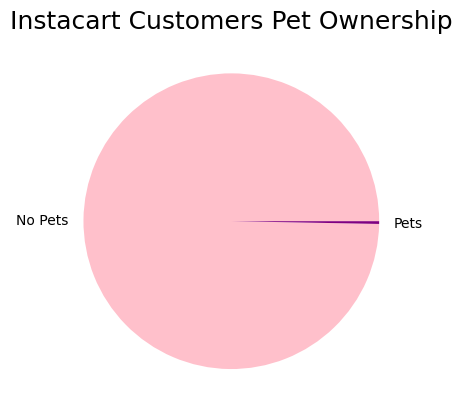

In [32]:
#Pie chart for pet owner profile
pet_pie = final_customer_data['pet_owner'].value_counts().plot.pie(labels = ['No Pets','Pets'], colors = ['pink', 'purple'], label = '')
plt.title("Instacart Customers Pet Ownership", fontsize = '18')

Text(0.5, 1.0, 'Instacart Customer Family Size')

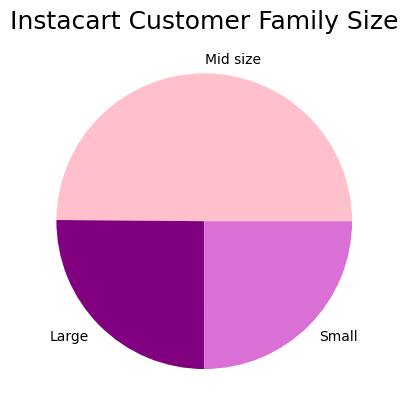

In [48]:
#Pie chart for number of dependents
family_pie = final_customer_data['family_size'].value_counts().plot.pie(colors = ['pink', 'purple', 'orchid'], label = '')
plt.title("Instacart Customer Family Size", fontsize = '18')

Text(0, 0.5, 'Frequency (in millions)')

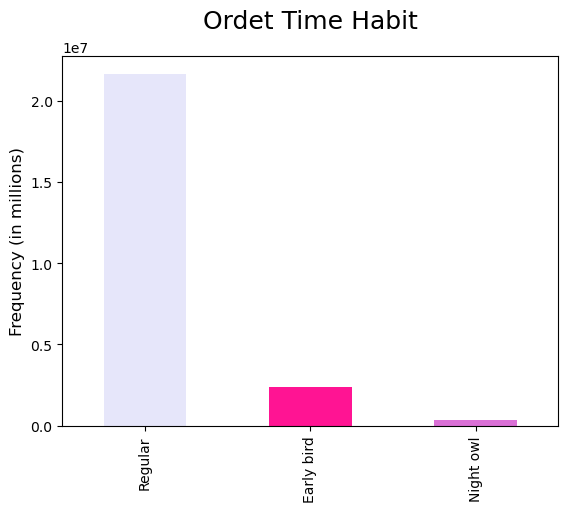

In [46]:
#Bar chart for Hour Preference
habit_bar = final_customer_data['order_time_habit'].value_counts().plot.bar( color = ['lavender', 'deeppink', 'orchid'])
plt.title('Ordet Time Habit', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)

Text(0.5, 0, 'Region')

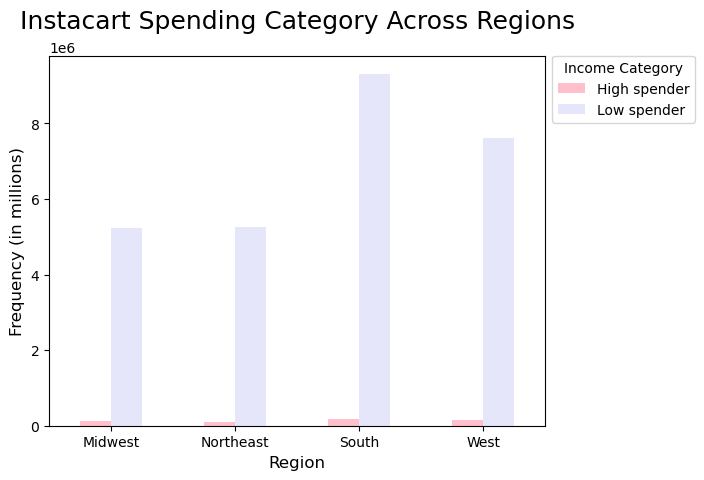

In [101]:
#Stacked bar chart of spending categories across regions
bar_spender = crosstab.plot(kind = 'bar', rot = 0, color= ['pink', 'lavender'])
bar_spender.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Instacart Spending Category Across Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)


Text(0.5, 1.0, 'Instacart Age Category')

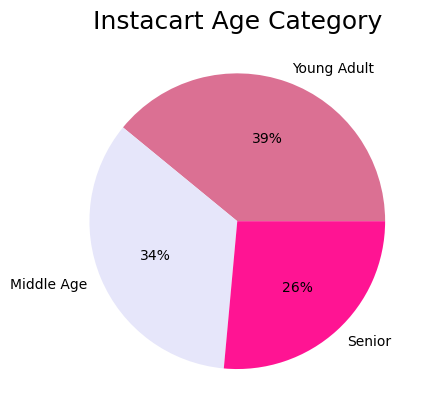

In [98]:
#Bar chart of Instacart's Age Groups
age_pie = final_customer_data['age category'].value_counts().plot.pie(labels = ['Young Adult','Middle Age', 'Senior'], autopct=('%1.f%%'), colors = ['palevioletred', 'lavender', 'deeppink'], label = '')
plt.title("Instacart Age Category", fontsize = '18')
                                                                     

Text(0, 0.5, 'Frequency (in millions)')

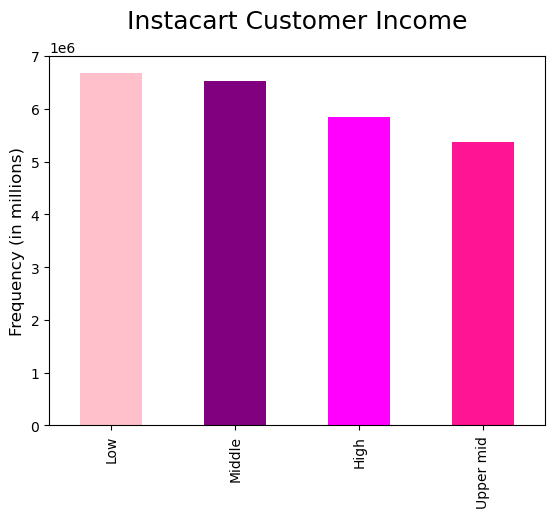

In [95]:
#Stacked bar chart of income categories across regions
income_bar = final_customer_data['income_category'].value_counts().plot.bar( color = ['pink', 'purple', 'magenta', 'deeppink'])
plt.title('Instacart Customer Income', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)


In [60]:
# Stacked bar chart of income_category across regions
income_region = pd.crosstab (final_customer_data['region'],final_customer_data['income_category'], dropna = False)
income_region

income_category,High,Low,Middle,Upper mid
region,,,,
Midwest,1046551,1161911,1132812,960670
Northeast,1032278,1164441,1160881,957671
South,1816502,2112962,2075307,1644945
West,1491484,1730944,1656917,1379419


Text(0.5, 0, 'Region')

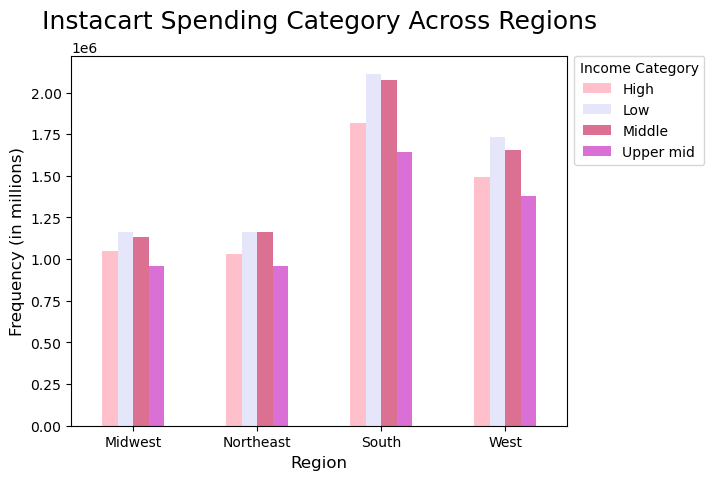

In [92]:
#Stacked bar chart of Income categories across regions
bar_income = income_region.plot(kind = 'bar', rot = 0, color= ['pink', 'lavender', 'palevioletred', 'orchid'])
bar_income.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Instacart Spending Category Across Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

# Aggregate customer profile level for usage frequency and expenditure

In [122]:
# Department category aggregation
final_customer_data.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
department                              
bakery           16.299581  8.0     25.0
beverages         7.977830  1.0     15.0
dry goods pasta   8.021686  1.0     20.0
international     4.274953  1.6      7.0
missing          32.264209  1.0  99999.0
pets              8.039889  1.0     14.9
produce           8.327531  1.4     14.1

In [45]:
#Age category 
final_customer_data.groupby('age category').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                          mean  min    max
age category                              
Middle Age            8.367226  1.0  137.0
Senior                8.309771  1.0   99.0
Young Adult           8.437359  1.0  109.0

In [46]:
#Region Category 
final_customer_data.groupby('region').agg({'prices' : ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    13.145429  1.0  99999.0
Northeast  11.290229  1.0  99999.0
South      12.080600  1.0  99999.0
West       10.897110  1.0  99999.0

In [53]:
#Region usage
final_customer_data.groupby('region').agg ({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                       mean  min    max
region                                 
Midwest            8.352674  1.0  109.0
Northeast          8.398715  1.0  121.0
South              8.374682  1.0  137.0
West               8.372988  1.0  114.0

# 8. Compare customer profiles

In [62]:
#Age and Order of the day
crosstab_agg_day = pd.crosstab(final_customer_data['age category'], final_customer_data['orders_day_of_week'], dropna = False)

Text(0.5, 0, 'Age Category')

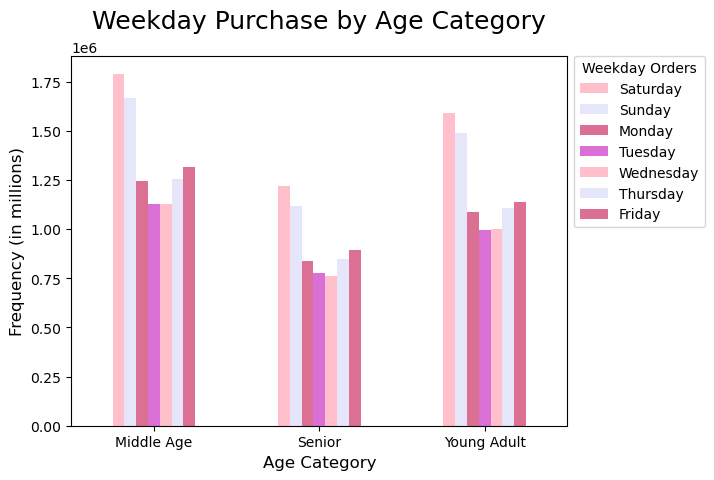

In [68]:
#Stacked bar chart of Income categories across regions
bar_age_day = crosstab_agg_day.plot(kind = 'bar', rot = 0, color= ['pink', 'lavender', 'palevioletred', 'orchid'])
bar_age_day.legend(title='Weekday Orders', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Weekday Purchase by Age Category', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 12)

In [75]:
#Crosstab on order time habits and region
habit = pd.crosstab(final_customer_data['region'], final_customer_data['order_hour_of_day'], dropna = False)

Text(0.5, 0, 'Age Category')

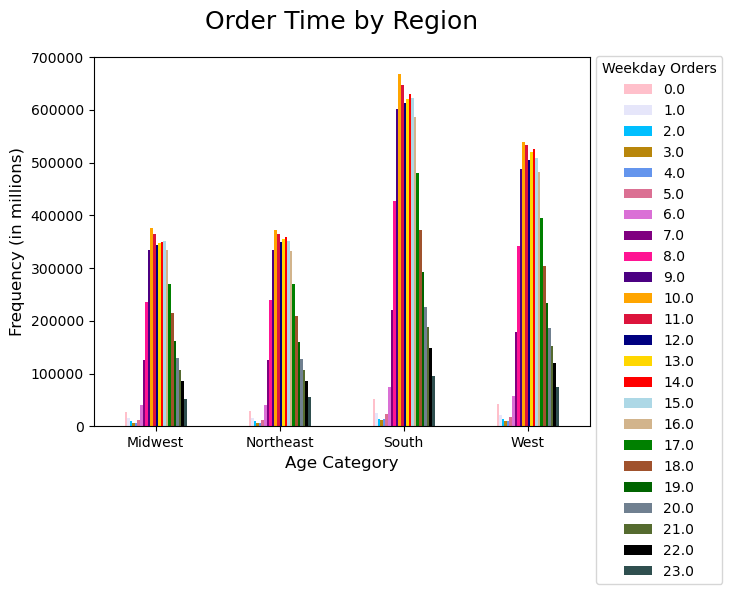

In [87]:
#Stacked bar chart of Income categories across regions
bar_habit = habit.plot(kind = 'bar', rot = 0, color= ['pink', 'lavender', 'deepskyblue', 'darkgoldenrod', 'cornflowerblue', 'palevioletred', 'orchid', 'purple', 'deeppink', 'indigo', 'orange', 'crimson', 'navy', 'gold', 'red', 'lightblue', 'tan', 'green', 'sienna', 'darkgreen', 'slategrey', 'darkolivegreen', 'black', 'darkslategrey'])
bar_habit.legend(title='Weekday Orders', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Order Time by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 12)

# 9. Exporting 

In [89]:
# Exporting .png
bar_habit.figure.savefig(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Analysis/bar_habit.png')

In [90]:
bar_age_day.figure.savefig(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Analysis/bar_age_day.png')

In [93]:
bar_income.figure.savefig(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Analysis/bar_income.png')

In [96]:
income_bar.figure.savefig(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Analysis/income_bar.png')

In [99]:
age_pie.figure.savefig(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Analysis/age_pie.png')

In [103]:
bar_spender.figure.savefig(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Analysis/bar_spender.png')

In [34]:
time_habit_bar.figure.savefig(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Analysis/time_habit_bar.png')

In [35]:
pet_pie.figure.savefig(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Analysis/pet_pie.png')

In [47]:
family_pie.figure.savefig(r'/Users/ronaldcameron/Documents/Data Analytics/Achievement 4 - Python/02:2023 Insta Cart Basket Analysis/Analysis/family_pie.png')

In [49]:
final_customer_data.shape

(24414877, 40)